# Medical Text Classification

**Objective:**  
Build a multi-class classification model to categorize medical reports into disease categories.  

**Dataset:** `gretelai/symptom_to_diagnosis` (English symptoms → diagnosis)  

**Pipeline includes:**  
- Data loading & preprocessing  
- TF-IDF vectorization  
- Training 3 ML models: Random Forest, Logistic Regression, Linear SVM  
- Model comparison (Accuracy, Precision, Recall, F1-Score)  
- Hyperparameter tuning for Random Forest  
- Saving the best model and TF-IDF vectorizer  


# Installing Required Libraries
We need the following Python libraries:
- `datasets` to load the Hugging Face dataset  
- `scikit-learn` for machine learning models and metrics  
- `matplotlib` & `seaborn` for visualization  
- `joblib` to save the trained model and TF-IDF vectorizer


In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn


# Data Loading & Preprocessing
- The dataset contains `input_text` (symptoms) and `output_text` (diagnosis).  
- We encode the diagnosis labels using `LabelEncoder`.  
- Text data is converted into numerical features using `TF-IDF` vectorization, which converts words into feature vectors.


In [2]:
from datasets import load_dataset
import pandas as pd

dataset = load_dataset("gretelai/symptom_to_diagnosis")
print(dataset)


DatasetDict({
    train: Dataset({
        features: ['output_text', 'input_text'],
        num_rows: 853
    })
    test: Dataset({
        features: ['output_text', 'input_text'],
        num_rows: 212
    })
})


# Dataset Overview
- **Shape of training and test sets**: Shows number of samples and columns.  
- **First few rows**: Understand the structure of the dataset.  
  - `input_text`: Symptoms reported by patients  
  - `output_text`: Diagnosis labels


In [3]:
df_train = pd.DataFrame(dataset['train'])
df_test  = pd.DataFrame(dataset['test'])

print("Train shape:", df_train.shape)
print("Test shape:", df_test.shape)
df_train.head()

Train shape: (853, 2)
Test shape: (212, 2)


,output_text,input_text
0,cervical spondylosis,I've been having a lot of pain in my neck and ...
1,impetigo,I have a rash on my face that is getting worse...
2,urinary tract infection,I have been urinating blood. I sometimes feel ...
3,arthritis,I have been having trouble with my muscles and...
4,dengue,I have been feeling really sick. My body hurts...


# Missing Values Check
- Ensures there are no missing values in input_text or output_text.  
- If missing values exist, we would need to handle them (e.g., drop or fill).


In [4]:
print("Missing values in training set:\n", df_train.isnull().sum())
print("Missing values in test set:\n", df_test.isnull().sum())


Missing values in training set:
 output_text    0
input_text     0
dtype: int64
Missing values in test set:
 output_text    0
input_text     0
dtype: int64


# Class Distribution
- Shows the number of samples per diagnosis in the training set.  
- Helps identify any **class imbalance**, which can affect model performance on underrepresented classes.


In [5]:
print(df_train['output_text'].value_counts())
import matplotlib.pyplot as plt
import seaborn as sns



output_text
cervical spondylosis               40
allergy                            40
chicken pox                        40
diabetes                           40
psoriasis                          40
hypertension                       40
impetigo                           40
bronchial asthma                   40
varicose veins                     40
malaria                            40
drug reaction                      40
dengue                             40
arthritis                          40
fungal infection                   39
common cold                        39
gastroesophageal reflux disease    39
urinary tract infection            39
typhoid                            38
pneumonia                          37
peptic ulcer disease               37
jaundice                           33
migraine                           32
Name: count, dtype: int64


# Using NLP Technique TF-IDF 

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

X_train = df_train['input_text']
y_train = df_train['output_text']
X_test  = df_test['input_text']
y_test  = df_test['output_text']

In [7]:
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc  = le.transform(y_test)

In [8]:
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf  = tfidf.transform(X_test)

# Train-Test Split
- In this dataset (gretelai/symptom_to_diagnosis), the dataset is already split into train and test (dataset['train'] and dataset['test']), so I didn’t explicitly do a train_test_split.

# Logistic Regression
- Logistic Regression is a linear model suitable for multi-class classification with TF-IDF features.  
- Evaluated using the same metrics.  
- Linear models often perform better on high-dimensional sparse text data than tree-based models.


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_tfidf, y_train_enc)
y_pred_lr = lr.predict(X_test_tfidf)


acc_lr = accuracy_score(y_test_enc, y_pred_lr)
print("--- Logistic Regression ---")
print("Accuracy: {:.2f}%".format(acc_lr*100))
print(classification_report(y_test_enc, y_pred_lr))

--- Logistic Regression ---
Accuracy: 91.04%
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       1.00      1.00      1.00        10
           2       0.91      1.00      0.95        10
           3       1.00      1.00      1.00        10
           4       1.00      0.90      0.95        10
           5       0.82      0.90      0.86        10
           6       0.80      0.80      0.80        10
           7       1.00      0.80      0.89        10
           8       0.75      0.75      0.75         8
           9       1.00      1.00      1.00         9
          10       0.69      0.90      0.78        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      0.86      0.92         7
          14       1.00      1.00      1.00        10
          15       1.00      0.90      0.95        10
          16       1.00      0.50   

# Linear SVM
- Linear SVM handles high-dimensional sparse TF-IDF features very effectively.  
- Often achieves higher accuracy than Random Forest or Logistic Regression on text data.  
- Evaluated using Accuracy, Precision, Recall, and F1-Score.


In [10]:
from sklearn.svm import LinearSVC


svm = LinearSVC()
svm.fit(X_train_tfidf, y_train_enc)
y_pred_svm = svm.predict(X_test_tfidf)


acc_svm = accuracy_score(y_test_enc, y_pred_svm)
print("--- Linear SVM ---")
print("Accuracy: {:.2f}%".format(acc_svm*100))
print(classification_report(y_test_enc, y_pred_svm))


--- Linear SVM ---
Accuracy: 94.81%
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       1.00      1.00      1.00        10
           2       0.91      1.00      0.95        10
           3       1.00      1.00      1.00        10
           4       1.00      0.90      0.95        10
           5       0.90      0.90      0.90        10
           6       1.00      0.80      0.89        10
           7       1.00      1.00      1.00        10
           8       0.80      1.00      0.89         8
           9       1.00      1.00      1.00         9
          10       0.75      0.90      0.82        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00         7
          14       1.00      1.00      1.00        10
          15       1.00      0.90      0.95        10
          16       1.00      0.70      0.82  

# Random Forest (Default)
- Trained a Random Forest classifier with default parameters.  
- Evaluated using Accuracy, Precision, Recall, and F1-Score.  
- Random Forest is a tree-based ensemble model suitable for tabular data but may perform moderately on high-dimensional sparse text features.


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_tfidf, y_train_enc)
y_pred_rf = rf.predict(X_test_tfidf)

acc_rf = accuracy_score(y_test_enc, y_pred_rf)
print("--- Random Forest (Default) ---")
print("Accuracy: {:.2f}%".format(acc_rf*100))
print(classification_report(y_test_enc, y_pred_rf))


--- Random Forest (Default) ---
Accuracy: 90.57%
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      1.00      1.00        10
           2       0.91      1.00      0.95        10
           3       0.91      1.00      0.95        10
           4       0.80      0.80      0.80        10
           5       1.00      0.90      0.95        10
           6       0.67      0.40      0.50        10
           7       1.00      0.80      0.89        10
           8       0.80      1.00      0.89         8
           9       1.00      0.89      0.94         9
          10       0.90      0.90      0.90        10
          11       0.91      1.00      0.95        10
          12       0.91      1.00      0.95        10
          13       1.00      0.86      0.92         7
          14       0.91      1.00      0.95        10
          15       1.00      0.90      0.95        10
          16       1.00      0.9

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

comparison_df = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression', 'Linear SVM'],
    'Accuracy (%)': [acc_rf*100, acc_lr*100, acc_svm*100]
})

print("=== Model Comparison Table ===")
print(comparison_df)



=== Model Comparison Table ===
                 Model  Accuracy (%)
0        Random Forest     90.566038
1  Logistic Regression     91.037736
2           Linear SVM     94.811321


# Random Forest Hyperparameter Tuning
- GridSearchCV used to tune number of trees (`n_estimators`) and maximum depth (`max_depth`).  
- Best Random Forest model evaluated on test set.  
- Even after tuning, Linear SVM often performs better for high-dimensional sparse text features.


In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 50]
}

rf_grid = RandomForestClassifier(random_state=42)
grid = GridSearchCV(rf_grid, param_grid, cv=3, scoring='accuracy')
grid.fit(X_train_tfidf, y_train_enc)

best_rf = grid.best_estimator_
y_pred_best_rf = best_rf.predict(X_test_tfidf)

acc_best_rf = accuracy_score(y_test_enc, y_pred_best_rf)
print("--- Random Forest (Tuned) ---")
print("Best params:", grid.best_params_)
print("Accuracy: {:.2f}%".format(acc_best_rf*100))
print(classification_report(y_test_enc, y_pred_best_rf))


--- Random Forest (Tuned) ---
Best params: {'max_depth': 50, 'n_estimators': 200}
Accuracy: 91.51%
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      1.00      1.00        10
           2       0.91      1.00      0.95        10
           3       1.00      1.00      1.00        10
           4       0.78      0.70      0.74        10
           5       1.00      0.90      0.95        10
           6       0.83      0.50      0.62        10
           7       0.89      0.80      0.84        10
           8       0.88      0.88      0.88         8
           9       1.00      1.00      1.00         9
          10       0.90      0.90      0.90        10
          11       0.83      1.00      0.91        10
          12       1.00      1.00      1.00        10
          13       1.00      0.86      0.92         7
          14       0.91      1.00      0.95        10
          15       1.00      0.90   

# Model Accuracy Comparison
- Bar plot visualizing the accuracy of all models trained:  
  - Random Forest (Default)  
  - Logistic Regression  
  - Linear SVM  
- This plot clearly highlights the best-performing model, which in this case is **Linear SVM**.


C:\Users\DELL\AppData\Local\Temp\ipykernel_21180\987572992.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy (%)', y='Model', data=comparison_df, palette='viridis')


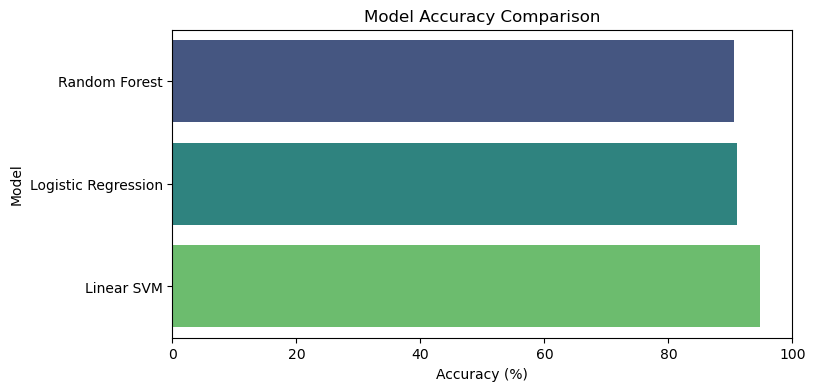

In [18]:
plt.figure(figsize=(8,4))
sns.barplot(x='Accuracy (%)', y='Model', data=comparison_df, palette='viridis')
plt.title("Model Accuracy Comparison")
plt.xlim(0,100)
plt.show()

# Save Best Model and TF-IDF Vectorizer
- The best-performing model (Linear SVM) is saved as `best_svm_model.pkl`.  
- TF-IDF vectorizer is saved as `tfidf_vectorizer.pkl` to process new text data consistently.  
- These files can be used for deployment or further predictions.


In [15]:
import joblib


joblib.dump(svm, "best_svm_model.pkl")


joblib.dump(tfidf, "tfidf_vectorizer.pkl")

print("✅ Best model (Linear SVM) and TF-IDF vectorizer saved successfully!")


✅ Best model (Linear SVM) and TF-IDF vectorizer saved successfully!


In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import pandas as pd


metrics = []

for name, y_pred in [("Random Forest", y_pred_rf),
                     ("Logistic Regression", y_pred_lr),
                     ("Linear SVM", y_pred_svm),
                     ("Random Forest (Tuned)", y_pred_best_rf)]:
    acc = accuracy_score(y_test_enc, y_pred)
    prec = precision_score(y_test_enc, y_pred, average='weighted')
    rec = recall_score(y_test_enc, y_pred, average='weighted')
    f1 = f1_score(y_test_enc, y_pred, average='weighted')
    
    metrics.append({
        "Model": name,
        "Accuracy (%)": round(acc*100,2),
        "Precision": round(prec,2),
        "Recall": round(rec,2),
        "F1-Score": round(f1,2)
    })


comparison_report = pd.DataFrame(metrics)
print("=== Model Comparison Report ===")
print(comparison_report)


=== Model Comparison Report ===
                   Model  Accuracy (%)  Precision  Recall  F1-Score
0          Random Forest         90.57       0.91    0.91      0.90
1    Logistic Regression         91.04       0.92    0.91      0.91
2             Linear SVM         94.81       0.95    0.95      0.95
3  Random Forest (Tuned)         91.51       0.92    0.92      0.91


### We performed EDA and preprocessing, applied TF-IDF for NLP feature extraction, trained three machine learning models, compared them using standard evaluation metrics, applied hyperparameter tuning, visualized results, and saved the best-performing model. Linear SVM performed best due to its suitability for high-dimensional sparse text data.

In [17]:

import joblib
joblib.dump(le, "label_encoder.pkl")

print("✅ LabelEncoder saved successfully!")


✅ LabelEncoder saved successfully!
